In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/Users/fonnescj/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Meta-analyses of Benefits and Harms by Surgical Intervention

## Import and Clean Data

In [4]:
outcomes = pd.read_excel('data/Tonsillectomy_Master_Outcome_data_Comparative_studies_04112016.xlsx', 
              sheetname='All_outcomes_KQ3-6', 
              na_values=['null', 'ND', 'NR'])

In [5]:
outcomes.head(3)

,Citation,REFID,Child Paper,Number of Arms,Rx Grouping,Group_Desc,Intervention_Category,Dose,Route,Rx_Durn,...,Outcome _Q3,Outcome Min,Outcome Max,Outcome 95% L,Outcome 95% H,Other stats Name,Other Stats,Results,Comments,Comments 2
0,K. W. Chang. Intracapsular versus subcapsular...,2428,NaN,2,G1:,Intracapsular coblation tonsillectomy,partial coblation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Outcome Mean %,56,"G1 vs. G2, p = 0.0549","return to normal diet data presented as ""mean ...",NaN
1,K. W. Chang. Intracapsular versus subcapsular...,2428,NaN,2,G2:,Subcapsular coblation tonsillectomy,total coblation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Outcome Mean %,42,NaN,NaN,NaN
2,K. W. Chang. Intracapsular versus subcapsular...,2428,NaN,2,G1:,Intracapsular coblation tonsillectomy,partial coblation,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Outcome Mean %,73,"G1 vs. G2, p < 0.05","return to normal activity reported as ""mean pe...",NaN


In [6]:
study_info = pd.read_excel('data/Tonsillectomy_Master_Outcome_data_Comparative_studies_04112016.xlsx', 
              sheetname='BASIC_Charact', 
              na_values=['null', 'ND'])

In [7]:
study_info.head()

,REFID,Child_ID,Population_Catg,Diagnostic Method,Population specify,Trial name,Study Design,Rx setting,Intervention TMPT,Rx Durn,...,N_Rx_Completed,N1,N2,N3,N4,N5,Age(years) Mean ±SD/ range,Antibiotics given at any time,Comments,Comments 2
0,806 _534_359_164_195_120,NaN,OSDB,PSG,obstructive sleep apnea syndrome without prolo...,CHAT,RCT,Sleep centers,surgery,NaN,...,397,194.0,203.0,NaN,NaN,NaN,5 to 9.9,No,"subgroup analysis by race, obesity",NaN
1,3241,NaN,OSDB,PSG,Children with OSA,NaN,RCT,Pediatric otolaryngology private office and cl...,surgery,NaN,...,41,21.0,11.0,9.0,NaN,NaN,2 to 14,No,Mean age of the children who completed the pro...,NaN
2,546,NaN,OSDB,PSG,Children with clinically suspected SDB and hea...,NaN,Prospective cohort,recruited from previous SDB study on blood pre...,surgery,NaN,...,38,12.0,26.0,NaN,NaN,NaN,7 to 12,No,Did not extract data for control arm in the ou...,NaN
3,2294,NaN,OSDB,videonasopharyngoscopic study with pharyngeal ...,Pediatric patients with pharyngeal and palatin...,NaN,Prospective cohort,Otorhinolaryngology public service,surgery,NaN,...,22,12.0,10.0,NaN,NaN,NaN,3y4m to 10y3m,No,G1: 3 years 4 month to 9 years 8 month; G2: 4 ...,NaN
4,1729,NaN,OSDB,PSG,Children with PSG-proven OSA,NaN,Prospective cohort,Sleep-wake disorder unit,surgery,NaN,...,20,14.0,6.0,NaN,NaN,NaN,G1: 6.4±2.5 G2: 5.4±2.3,No,NaN,NaN


In [8]:
outcomes.columns

Index(['Citation', 'REFID', 'Child Paper', 'Number of \nArms', 'Rx Grouping',
       'Group_Desc', 'Intervention_Category', 'Dose', 'Route', 'Rx_Durn',
       'Last Assesment tmpt for the study', 'Followup duration category',
       'OUTC_Main_\nCATG', 'Outc_SUB_\nCATG', 'Outcome_specify',
       'Presentation \nlocation', 'Outc_Unit', 'Outc_Tool',
       'Outcome timepoint (when was this outcome measured, e.g., in PACU, 12 months post-op, immediately post-op--would need a row for each outcome at each timepoint of interest)',
       'Outcome sample size', 'Outcome\ncount', 'Outcome  \n%',
       'Outcome\n Mean', 'Outcome \nSD', 'Outcome \n SE', 'Outcome \n Median',
       'Outcome\n _Q1', 'Outcome \n_Q3', 'Outcome\n  Min', 'Outcome \n Max',
       'Outcome \n 95% L', 'Outcome \n 95% H', 'Other stats \nName',
       'Other Stats', 'Results', 'Comments', 'Comments 2'],
      dtype='object')

In [9]:
data_merged = (outcomes.merge(study_info, on='REFID')[['REFID', 
                                                      'Intervention_Category', 
                                                      'OUTC_Main_\nCATG', 
                                                      'Outc_SUB_\nCATG',
                                                      'Outcome_specify',
                                                      'Study Design', 
                                                      'Population_Catg', 
                                                      'Outcome sample size',
                                                      'Outcome\ncount',
                                                      'Outcome\n Mean', 
                                                      'Outcome \nSD',
                                                      'Outc_Unit']]
               .rename(columns={'OUTC_Main_\nCATG':'Outcome_cat', 
                                'Outc_SUB_\nCATG':'Outcome_subcat',
                                'Outcome\ncount':'Outcome_count',
                                'Outcome\n Mean':'Outcome_mean',
                                'Outcome \nSD':'Outcome_sd',
                                'Outcome sample size':'Outcome_n'}))
data_merged.head()

,REFID,Intervention_Category,Outcome_cat,Outcome_subcat,Outcome_specify,Study Design,Population_Catg,Outcome_n,Outcome_count,Outcome_mean,Outcome_sd,Outc_Unit
0,2428,partial coblation,Return to normal diet,Time to Return to normal diet,return to normal diet (mean % of diet resumed),RCT,OSDB,34.0,NaN,NaN,NaN,NaN
1,2428,total coblation,Return to normal diet,Time to Return to normal diet,return to normal diet (mean % of diet resumed),RCT,OSDB,35.0,NaN,NaN,NaN,NaN
2,2428,partial coblation,Return to normal diet,Time to Return to normal diet,return to normal diet (mean % of diet resumed),RCT,OSDB,34.0,NaN,NaN,NaN,NaN
3,2428,total coblation,Return to normal diet,Time to Return to normal diet,return to normal diet (mean % of diet resumed),RCT,OSDB,35.0,NaN,NaN,NaN,NaN
4,2428,partial coblation,Return to normal activity,Time to Return to normal activity,return to normal activity (mean % of activity ...,RCT,OSDB,34.0,NaN,NaN,NaN,NaN


In [10]:
data_merged.groupby(['Study Design', 'Intervention_Category'])['Outcome_n'].sum().astype(int)

Study Design          Intervention_Category                                 
Non-randomized trial  Postoperative Analgesic                                    450
                      Postoperative NSAID                                        230
                      partial coblation                                          838
                      perioperative steroid                                      248
                      placebo                                                    232
                      total bilateral                                             90
                      total coblation                                             42
                      total cold                                                 438
                      total cold                                                1560
                      total electrocautery                                      1272
                      total thermal welding                              

In [11]:
data_merged['Intervention_Category'] = data_merged.Intervention_Category.str.lower().str.strip()
clean_data = data_merged.replace({'Intervention_Category':{'saline':'control',
                        'control (no rx)':'control',
                        'control (no dexamethasone)':'control',
                        'no antibiotics':'control',
                        'no steroid':'control',
                        'placebo':'control'}})

In [12]:
surgery_data = clean_data[clean_data.Intervention_Category.str.contains('total') 
                   | clean_data.Intervention_Category.str.contains('partial')].copy()

Indicator variable for partial tonsillectomy

In [13]:
surgery_data['partial'] = surgery_data.Intervention_Category.str.contains('partial')

Surgical technique

In [14]:
surgery_data['technique'] = (surgery_data.Intervention_Category
        .apply(lambda x: ' '.join(x.split(' ')[1:]))
        .replace({'tonsillectomy - coblation':'coblation'}))

surgery_data = surgery_data[~(surgery_data.technique.str.contains('specified')|
                             surgery_data.technique.str.contains('\+'))]

In [15]:
surgery_data.technique.value_counts()

cold                   135
electrocautery         134
coblation              113
harmonic scalpel        30
laser                   21
molecular resonance     19
microdebrider           16
thermal welding         13
unilateral               1
bilateral                1
Name: technique, dtype: int64

Drop poorly-represented methods

In [16]:
technique_includes = surgery_data.technique.value_counts().index[:-2].tolist()
surgery_data = surgery_data[surgery_data.technique.isin(technique_includes)]

In [17]:
technique_includes

['cold',
 'electrocautery',
 'coblation',
 'harmonic scalpel',
 'laser',
 'molecular resonance',
 'microdebrider',
 'thermal welding']

In [18]:
surgery_data.Outcome_cat.value_counts()

Harms                        306
Return to normal diet         74
Return to normal activity     50
Throat infection              10
Health                        10
Tonsillar regrowth             8
Sleep                          8
Pain management                7
Return to School               4
Cognitive                      2
QOL                            2
Name: Outcome_cat, dtype: int64

Pool throat infection with harms

In [19]:
surgery_data = surgery_data.replace({'Outcome_cat':{'Throat infection':'Harms'}})

In [20]:
surgery_data[surgery_data.Outcome_cat=='Harms'].Outcome_subcat.value_counts()

Harms: Post-op bleeding                150
Harms-Re-operation for bleeding         49
Harms- readmission for dehydration      34
Harms- readmission for bleeding         27
Harms- readmission for PONV             11
Harms-Death-30 day                      10
Throat infection-number                  8
Harms-other                              6
Harms- readmission for post-op pain      6
Harms- ER visit for post-op pain         3
Harms- ER visit for bleeding             2
Harms-Velopharyngeal insufficiency       2
Harms- ER visit-Unspecified              2
Harms - readmission for dehydration      2
Harms-Hospital admission                 2
Throat infection-# strep infections      2
Name: Outcome_subcat, dtype: int64

Subset of return to normal diet/activity

In [21]:
return_subset = surgery_data[surgery_data.Outcome_cat.str.startswith('Return to normal') &
                            (surgery_data.Outc_Unit=='days')]

In [22]:
dummies = pd.get_dummies(return_subset.Outcome_cat).T
outcome_means = (dummies * return_subset.Outcome_mean).T
outcome_means.columns = 'activity_mean', 'diet_mean'
outcome_sds = (dummies * return_subset.Outcome_sd).T.dropna()
outcome_sds.columns = 'activity_sd', 'diet_sd'

In [23]:
return_outcomes = pd.merge(outcome_means, outcome_sds, left_index=True, right_index=True)

In [50]:
return_outcomes

,activity_mean,diet_mean,activity_sd,diet_sd
76,0.00,3.80,0.00,0.20
77,0.00,7.10,0.00,0.30
123,0.00,2.70,0.00,2.30
124,0.00,4.40,0.00,3.40
125,2.40,0.00,1.80,0.00
126,3.80,0.00,3.00,0.00
283,0.00,4.60,0.00,2.10
284,0.00,5.20,0.00,2.00
285,7.40,0.00,1.90,0.00
286,6.70,0.00,1.80,0.00


In [24]:
merged_data = surgery_data.merge(return_outcomes, left_index=True, right_index=True)

Summary of data by technique

In [26]:
(merged_data
         .groupby(['REFID', 'technique'])
        .agg({'Outcome_n': lambda x: int(sum(x)), 
              'activity_mean': lambda x: np.round(np.mean(x), 1), 
              'diet_mean': lambda x: np.round(np.mean(x), 1)}))

Outcome_n  activity_mean  diet_mean
REFID technique                                           
953   cold                 101.0            0.0        5.4
1372  cold                  99.0            0.0        7.0
      electrocautery       102.0            0.0        9.3
      thermal welding      104.0            0.0        7.3
2198  coblation             92.0            2.4        2.4
      electrocautery        94.0            3.3        3.2
      microdebrider         98.0            2.3        2.3
2891  electrocautery        76.0            1.9        2.2
      microdebrider         72.0            1.2        1.4
3002  cold                   8.0            0.0        2.8
      electrocautery        23.0            0.0        2.6
3253  coblation             88.0            3.7        2.3
      electrocautery        90.0            3.4        2.6
6317  coblation             94.0            3.8        3.1
      cold                  94.0            5.8        4.6

Summary of data by partial vs total removal

In [27]:
(merged_data
         .groupby(['REFID', 'partial'])
        .agg({'Outcome_n': lambda x: int(sum(x)), 
              'activity_mean': lambda x: np.round(np.mean(x), 1), 
              'diet_mean': lambda x: np.round(np.mean(x), 1)}))

Outcome_n  activity_mean  diet_mean
REFID partial                                     
953   False         51.0            0.0        7.1
      True          50.0            0.0        3.8
1372  False        305.0            0.0        7.9
2198  False        284.0            2.6        2.6
2891  False         76.0            1.9        2.2
      True          72.0            1.2        1.4
3002  False         31.0            0.0        2.7
3253  False        178.0            3.5        2.4
6317  False        188.0            4.8        3.9

From the above, there is not sufficient information on partial tonsillectomy on which to analyze return to activity or diet. The analysis below looks at return to normal diet as a function of surgical technique.

## Return to normal diet model

We meta-analyze the effects of a suite of surgical procedures on the time to return to normal diet following intervention. We model return times as continuous outcomes, using normal random variables informed by reported means and standard deviations observed within the arms of each study, and estimate the effect sizes associated with each procedure.

The surgical technique effects are evaluated using an indicator variables for each method relative to a baseline effect of cold (baseline method chosen arbitrarily). This is modeled as:

$$t_{ki} = N(\theta_{ki}, s_{ki})$$

where $t_{ki}$ is the observed mean time to return to normal diet of method $k$ in study $i$, and $s_{ki}$ the corresponding observed standard error. The expected value, is composed of the sum of a study level random effect $\phi_i$ and a technique fixed effect $\beta_k$:

$$\theta_{ki} = \phi_i + \beta_k$$

$$\phi_i \sim N(\mu, \sigma^2)$$

All parameters are given diffuse priors, reflecting no prior information.

In [62]:
from pymc3 import (NUTS, sample, Model, Deterministic, find_MAP,
                  Binomial, Normal, HalfCauchy, advi,
                  traceplot, summary, forestplot)

import theano.tensor as tt

Couldn't import dot_parser, loading of dot files will not be possible.


In [94]:
diet_data = merged_data.loc[(merged_data.diet_sd > 0) & (merged_data.technique!='thermal welding')] 
diet_mean, diet_sd, outcome_n = diet_data[['diet_mean', 'diet_sd', 'Outcome_n']].values.astype(float).T
refid, technique = diet_data[['REFID', 'technique']].values.T

In [95]:
diet_se = diet_sd/np.sqrt(outcome_n.astype(float))

In [106]:
refid_list = list(set(refid))
n_studies = len(refid_list)
study_id = diet_data.loc[diet_data.diet_sd > 0].REFID.apply(lambda i: refid_list.index(i)).values

In [107]:
diet_data.technique.value_counts()

electrocautery    5
cold              5
coblation         3
microdebrider     2
Name: technique, dtype: int64

In [115]:
techniques = pd.get_dummies(diet_data.technique)[['coblation', 'electrocautery', 'microdebrider']]

In [128]:
from theano import shared

with Model() as diet_model:
    
    # Study random effect
    μ = Normal('μ', 0, 1e-5, testval=3)
    σ = HalfCauchy('σ', 5, testval=2)
    ϕ = Normal('ϕ', μ, sd=σ, shape=n_studies)
    
    # Fixed effects for surgical technique
    β = Normal('β', 0, 1e-5, shape=n_techniques-1, testval=np.zeros(n_techniques-1))
    
    # Expected value of outcome by surgery and study (with base treatment shift)
    θ = Deterministic('θ', ϕ[study_id] + tt.dot(techniques, β))
    
    return_mean = Deterministic('return_mean', tt.concatenate([tt.stack(0), β]) + μ)
    
    # Data likelihoood
    outcome = Normal('outcome', θ, sd=diet_se, observed=diet_mean.astype(float))

Applied log-transform to σ and added transformed σ_log to model.


In [129]:
with diet_model:
    
    diet_trace = sample(2000, njobs=2)

Assigned NUTS to μ
Assigned NUTS to σ_log
Assigned NUTS to ϕ
Assigned NUTS to β
 [-----------------100%-----------------] 2000 of 2000 complete in 24.7 sec

Mean of study random effect; mean of about 6, with a 95% CrI of (3.5, 8.2).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117528be0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11596cb00>]], dtype=object)

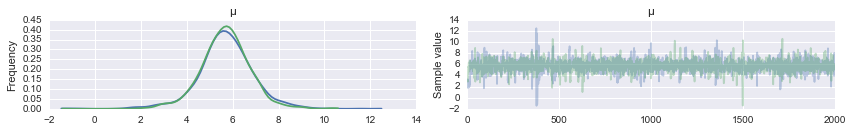

In [130]:
traceplot(diet_trace, varnames=['μ'])

In [134]:
summary(diet_trace, varnames=['μ'])


μ:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  5.705            1.148            0.023            [3.460, 8.174]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  3.234          5.071          5.713          6.359          8.037



/Users/fonnescj/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


Study effects for baseline (cold). Lots of heterogeneity (and few studies)

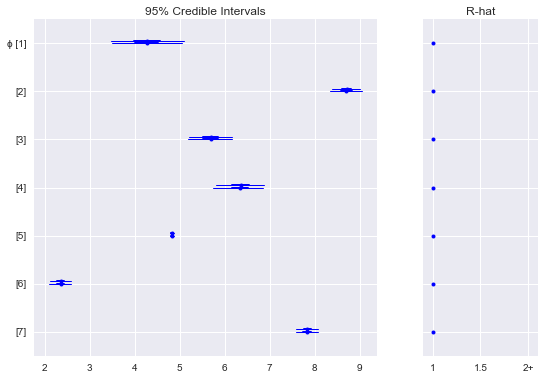

In [131]:
forestplot(diet_trace, varnames=['ϕ'])

Technique fixed effects (in days), relative to cold. Coblation and microdebrider reduce the time to return, while electrocautery increases it.

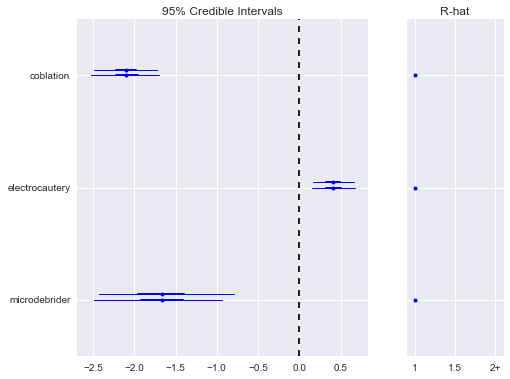

In [132]:
forestplot(diet_trace, varnames=['β'], ylabels=['coblation', 'electrocautery', 'microdebrider'])

Expected return times for each method. There is significant uncertainty relative to the estimated magnitude of the effects.

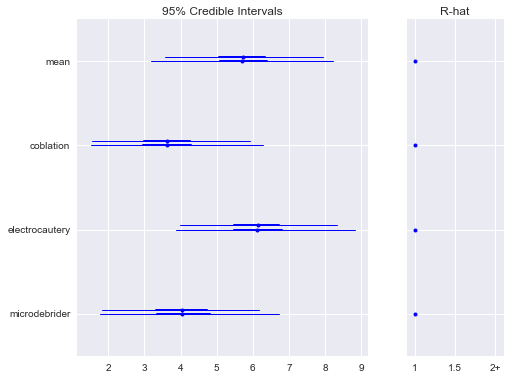

In [133]:
forestplot(diet_trace, varnames=['return_mean'], ylabels=['mean', 'coblation', 'electrocautery', 'microdebrider'])